In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

# Add a new dimension to the target tensor
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

# Convert the target tensor to categorical
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


In [10]:
#Create the architecture of the model
def make_model(input_shape,num_classes):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape = input_shape))
    model.add(tf.keras.layers.MaxPooling2D())

    model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D())

    model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D())

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(units = num_classes,activation="softmax"))

    return model    


In [11]:
input_shape = (28,28,1)
num_classes = 10
model = make_model(input_shape=input_shape,num_classes=num_classes)


In [16]:
epochs = 25
callbacks = [
    keras.callbacks.ModelCheckpoint("weightsforMNIST2/save_path_{epoch}.keras",save_best_only=True)
]
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,callbacks=callbacks,validation_data=(x_test,y_test),batch_size=64,epochs=epochs)

Epoch 1/25
938/938 [==============================] - 5s 5ms/step - loss: 0.1949 - accuracy: 0.9428 - val_loss: 0.0744 - val_accuracy: 0.9791
Epoch 2/25
938/938 [==============================] - 5s 5ms/step - loss: 0.1447 - accuracy: 0.9578 - val_loss: 0.0613 - val_accuracy: 0.9810
Epoch 3/25
938/938 [==============================] - 5s 5ms/step - loss: 0.1236 - accuracy: 0.9639 - val_loss: 0.0515 - val_accuracy: 0.9858
Epoch 4/25
938/938 [==============================] - 4s 5ms/step - loss: 0.1026 - accuracy: 0.9701 - val_loss: 0.0524 - val_accuracy: 0.9845
Epoch 5/25
938/938 [==============================] - 4s 5ms/step - loss: 0.0952 - accuracy: 0.9714 - val_loss: 0.0510 - val_accuracy: 0.9848
Epoch 6/25
938/938 [==============================] - 4s 5ms/step - loss: 0.0868 - accuracy: 0.9746 - val_loss: 0.0488 - val_accuracy: 0.9853
Epoch 7/25
938/938 [==============================] - 4s 5ms/step - loss: 0.0812 - accuracy: 0.9766 - val_loss: 0.0441 - val_accuracy: 0.9875
Epoch 

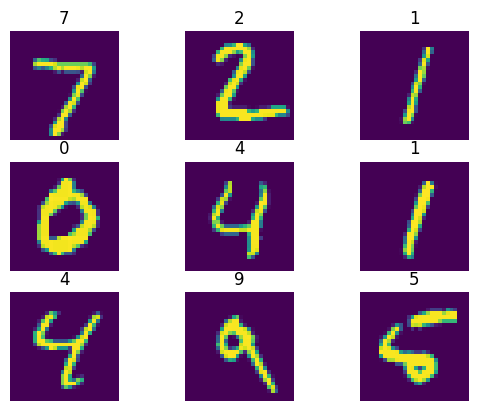

In [54]:
predictions = model.predict(x_test)
for i in range(9):
    image = x_test[i]
    prediction = predictions[i]

    ax = plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title(str(np.argmax(prediction)))
    plt.axis("off")
plt.show()